# Time series values for Vatnsendi pumpstation

In [68]:
import matplotlib.pyplot as plt
import pandas as pd

In [69]:
df_pressure_1 = pd.read_excel("data/H-KOP-VE-ÞS212.xlsx")
df_pressure_1.drop(columns=["mpoint_id","mpoint_name","aggregate_name","aggregate_id","flag","quality_description","event_time"],inplace=True)
df_pressure_2 = pd.read_excel("data/H-KOP-VE-ÞS213.xlsx")
df_pressure_2.drop(columns=["mpoint_id","mpoint_name","aggregate_name","aggregate_id","flag","quality_description","event_time"],inplace=True)

In [70]:
df_pressure_1.head()

,start_time,value
0,2022-03-14 23:00:00,9.0
1,2022-03-13 16:00:00,9.0
2,2022-03-08 02:00:00,9.0
3,2022-03-08 03:00:00,9.0
4,2022-03-13 18:00:00,9.0


In [71]:
df_pressure_2.head()

,start_time,value
0,2022-03-14 23:00:00,5.60
1,2022-03-13 16:00:00,5.55
2,2022-03-08 02:00:00,5.56
3,2022-03-08 03:00:00,5.56
4,2022-03-13 18:00:00,5.63


In [72]:
# Convert 'start_time' to datetime format
df_pressure_1['start_time'] = pd.to_datetime(df_pressure_1['start_time'], errors='coerce')

# Filter for a specific day (e.g., "2024-03-10")
specific_day = "2024-10-03"
df_specific_day = df_pressure_1[df_pressure_1['start_time'].dt.date == pd.to_datetime(specific_day).date()]

df_specific_day.set_index('start_time', inplace=True)
df_specific_day = df_specific_day.sort_index(ascending=True)
avg_flow = df_specific_day['value'].mean()  # Sum of all flow for that day
df_specific_day['demand_pattern'] = df_specific_day['value'] / avg_flow  # Normalized demand pattern
df_specific_day

,value,demand_pattern
start_time,,
2024-10-03 01:00:00,9.01,1.000966
2024-10-03 02:00:00,9.01,1.000966
2024-10-03 03:00:00,9.00,0.999855
2024-10-03 04:00:00,9.00,0.999855
2024-10-03 05:00:00,9.00,0.999855
2024-10-03 06:00:00,9.00,0.999855
2024-10-03 07:00:00,9.00,0.999855
2024-10-03 08:00:00,9.00,0.999855
2024-10-03 09:00:00,9.00,0.999855


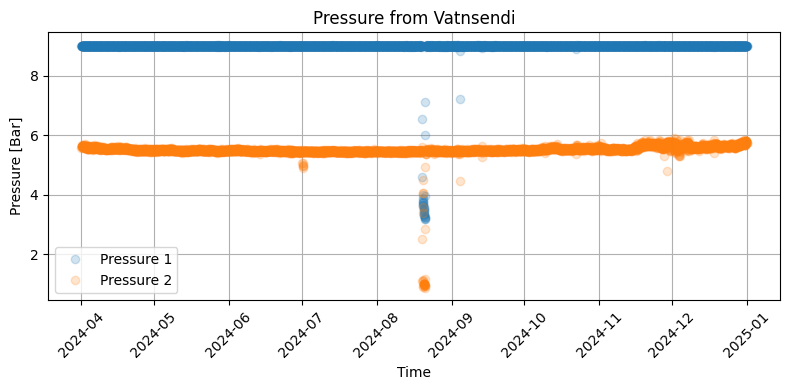

In [73]:
# Convert 'start_time' to datetime format for both DataFrames
df_pressure_1['start_time'] = pd.to_datetime(df_pressure_1['start_time'], errors='coerce')
df_pressure_2['start_time'] = pd.to_datetime(df_pressure_2['start_time'], errors='coerce')

# Filter for July 2024 in both DataFrames
df_filtered_1 = df_pressure_1[(df_pressure_1['start_time'].dt.year == 2024) & (df_pressure_1['start_time'].dt.month > 3)]
df_filtered_2 = df_pressure_2[(df_pressure_2['start_time'].dt.year == 2024) & (df_pressure_2['start_time'].dt.month > 3)]

# Create a figure
plt.figure(figsize=(8, 4))

# Plot pressure_1 from df_pressure_1
plt.plot(df_filtered_1['start_time'], df_filtered_1['value'], marker='o', linestyle='', alpha=0.2, label='Pressure 1')  # Alpha controls opacity

# Plot pressure_2 from df_pressure_2
plt.plot(df_filtered_2['start_time'], df_filtered_2['value'], marker='o', linestyle='', alpha=0.2, label='Pressure 2')  # Alpha controls opacity

# Customize plot
plt.xlabel('Time')
plt.ylabel('Pressure [Bar]')
plt.title('Pressure from Vatnsendi')  # Update the title
plt.grid(True)
plt.xticks(rotation=45)
# plt.ylim([7.7, 8])  # Set y-range from 7.7 to 8 (adjust as needed)

# Add a legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


In [74]:
df_flow_1 = pd.read_excel("data/H-KOP-VE-RS212.xlsx")
df_flow_1.drop(columns=["mpoint_id","mpoint_name","aggregate_name","aggregate_id","flag","quality_description","event_time"],inplace=True)
df_flow2 = pd.read_excel("data/H-KOP-VE-RS213.xlsx")
df_flow2.drop(columns=["mpoint_id","mpoint_name","aggregate_name","aggregate_id","flag","quality_description","event_time"],inplace=True)

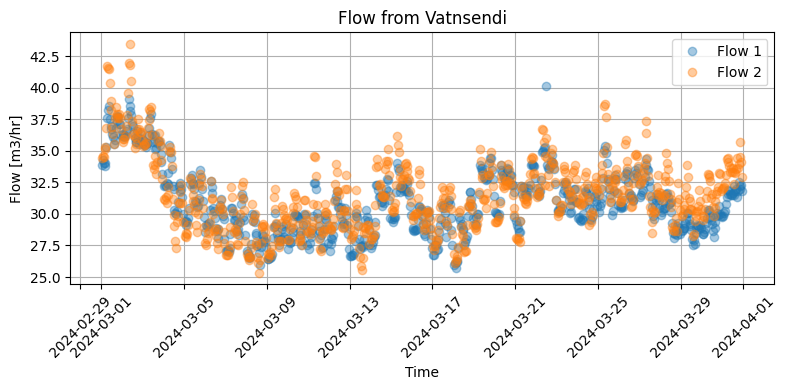

In [75]:
# Convert 'start_time' to datetime format for both DataFrames
df_flow_1['start_time'] = pd.to_datetime(df_flow_1['start_time'], errors='coerce')
df_flow2['start_time'] = pd.to_datetime(df_flow2['start_time'], errors='coerce')

# Filter for July 2024 in both DataFrames
df_filtered_1 = df_flow_1[(df_flow_1['start_time'].dt.year == 2024) & (df_flow_1['start_time'].dt.month == 3)]
df_filtered_2 = df_flow2[(df_flow2['start_time'].dt.year == 2024) & (df_flow2['start_time'].dt.month == 3)]

# Create a figure
plt.figure(figsize=(8, 4))

# Plot pressure_1 from df_flow_1
plt.plot(df_filtered_1['start_time'], df_filtered_1['value'], marker='o', linestyle='', alpha=0.4, label='Flow 1')  # Alpha controls opacity

# Plot pressure_2 from df_flow2
plt.plot(df_filtered_2['start_time'], df_filtered_2['value'], marker='o', linestyle='', alpha=0.4, label='Flow 2')  # Alpha controls opacity

# Customize plot
plt.xlabel('Time')
plt.ylabel('Flow [m3/hr]')
plt.title('Flow from Vatnsendi')  # Update the title
plt.grid(True)
plt.xticks(rotation=45)
# plt.ylim([7.7, 8])  # Set y-range from 7.7 to 8 (adjust as needed)

# Add a legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


In [76]:
# Convert 'start_time' to datetime format
df_flow_1['start_time'] = pd.to_datetime(df_flow_1['start_time'], errors='coerce')

# Filter for a specific day (e.g., "2024-03-10")
specific_day = "2024-11-03"
df_specific_day = df_flow_1[df_flow_1['start_time'].dt.date == pd.to_datetime(specific_day).date()]

# Print the filtered data for that specific day
print(df_specific_day)

               start_time  value
23981 2024-11-03 04:00:00  26.76
23982 2024-11-03 02:00:00  27.17
23983 2024-11-03 07:00:00  26.45
23984 2024-11-03 06:00:00  26.45
23985 2024-11-03 05:00:00  26.53
23986 2024-11-03 01:00:00  27.67
24005 2024-11-03 22:00:00  24.63
24013 2024-11-03 21:00:00  25.18
24014 2024-11-03 23:00:00  23.81
24015 2024-11-03 20:00:00  26.09
24049 2024-11-03 03:00:00  26.70
24096 2024-11-03 19:00:00  27.12
24097 2024-11-03 18:00:00  26.99
24098 2024-11-03 17:00:00  26.31
24099 2024-11-03 16:00:00  26.23
24100 2024-11-03 11:00:00  27.06
24101 2024-11-03 08:00:00  26.67
24102 2024-11-03 10:00:00  27.12
24103 2024-11-03 09:00:00  27.03
24112 2024-11-03 15:00:00  26.12
24113 2024-11-03 14:00:00  26.39
24114 2024-11-03 12:00:00  27.19
24115 2024-11-03 13:00:00  26.88


In [77]:
df_specific_day.set_index('start_time', inplace=True)
df_specific_day = df_specific_day.sort_index(ascending=True)
avg_flow = df_specific_day['value'].mean()  # Sum of all flow for that day
df_specific_day['demand_pattern'] = df_specific_day['value'] / avg_flow  # Normalized demand pattern
df_specific_day

,value,demand_pattern
start_time,,
2024-11-03 01:00:00,27.67,1.045781
2024-11-03 02:00:00,27.17,1.026884
2024-11-03 03:00:00,26.70,1.009120
2024-11-03 04:00:00,26.76,1.011388
2024-11-03 05:00:00,26.53,1.002695
2024-11-03 06:00:00,26.45,0.999671
2024-11-03 07:00:00,26.45,0.999671
2024-11-03 08:00:00,26.67,1.007986
2024-11-03 09:00:00,27.03,1.021592


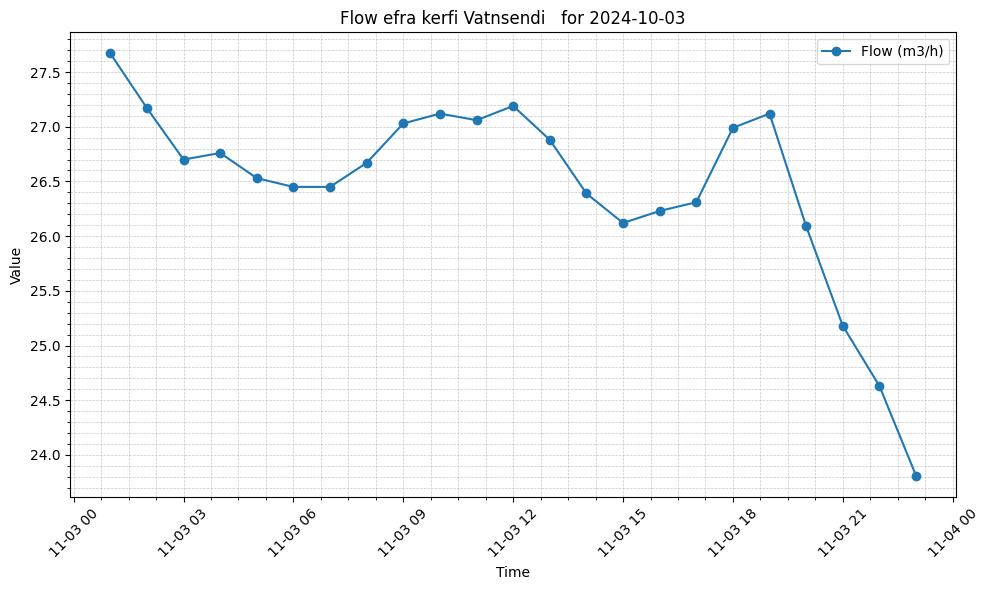

In [78]:
# Plot the value and demand_pattern columns from df_specific_day
plt.figure(figsize=(10, 6))

# Plot the flow value
plt.plot(df_specific_day.index, df_specific_day['value'], label='Flow (m3/h)', color='tab:blue', marker='o')

# Customize the plot
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Flow efra kerfi Vatnsendi   for 2024-10-03')
plt.xticks(rotation=45)

# Enable minor ticks for finer grid resolution
plt.minorticks_on()

# Apply finer grid resolution
plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Add a legend
plt.legend()

# Optimize layout
plt.tight_layout()

# Show the plot
plt.show()

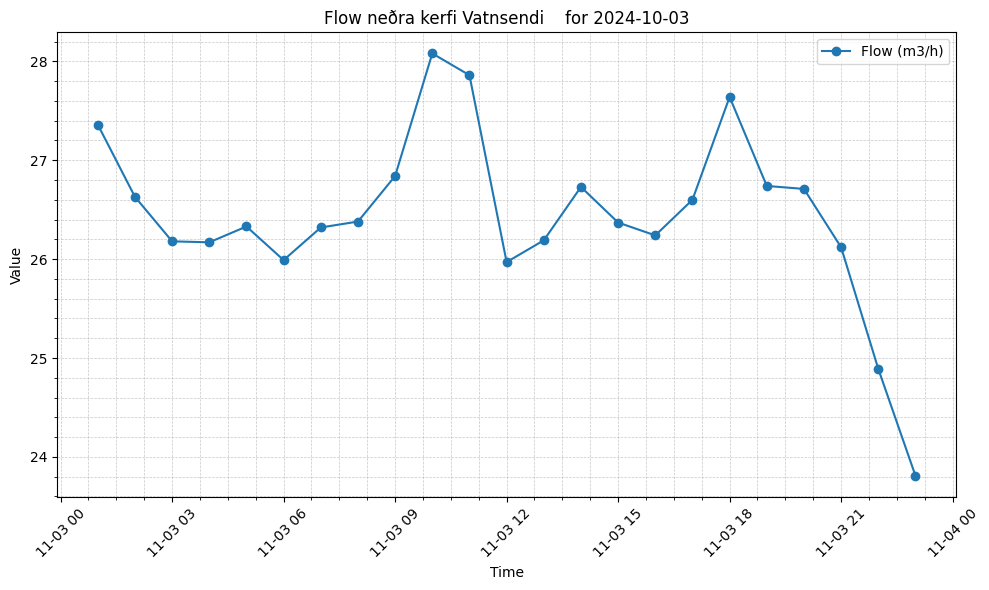

In [79]:
# Convert 'start_time' to datetime format
df_flow2['start_time'] = pd.to_datetime(df_flow2['start_time'], errors='coerce')

# Filter for a specific day (e.g., "2024-03-10")
specific_day = "2024-11-03"
df_specific_day = df_flow2[df_flow2['start_time'].dt.date == pd.to_datetime(specific_day).date()]

# Print the filtered data for that specific day

df_specific_day.set_index('start_time', inplace=True)
df_specific_day = df_specific_day.sort_index(ascending=True)
avg_flow = df_specific_day['value'].mean()  # Sum of all flow for that day
df_specific_day['demand_pattern'] = df_specific_day['value'] / avg_flow  # Normalized demand pattern

# Plot the value and demand_pattern columns from df_specific_day
plt.figure(figsize=(10, 6))

# Plot the flow value
plt.plot(df_specific_day.index, df_specific_day['value'], label='Flow (m3/h)', color='tab:blue', marker='o')

# Customize the plot
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Flow neðra kerfi Vatnsendi    for 2024-10-03')
plt.xticks(rotation=45)

# Enable minor ticks for finer grid resolution
plt.minorticks_on()

# Apply finer grid resolution
plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Add a legend
plt.legend()

# Optimize layout
plt.tight_layout()

# Show the plot
plt.show()

In [80]:
df_specific_day

,value,demand_pattern
start_time,,
2024-11-03 01:00:00,27.36,1.034745
2024-11-03 02:00:00,26.63,1.007136
2024-11-03 03:00:00,26.18,0.990118
2024-11-03 04:00:00,26.17,0.989739
2024-11-03 05:00:00,26.33,0.995791
2024-11-03 06:00:00,25.99,0.982932
2024-11-03 07:00:00,26.32,0.995412
2024-11-03 08:00:00,26.38,0.997681
2024-11-03 09:00:00,26.84,1.015079
